# Data Science seminars - Feature extraction in images assignment

**Author: Daniel Minguez Camacho**

## 1.- Introduction

This notebook is presented as an assignment for the seminar in feature extraction in images of the Data Science Master at Universidad Politécnica de Madrid. This seminar was about matching algorithms for finding patterns in images.

In this notebook we present an implementation of the different algorithms with opencv and in the end we implement one of them in a video caption.

## 2.- Functions and variables

The following are the libraries and variables we will be using during the notebook

In [1]:
import cv2
import numpy as np
import time 
import matplotlib.pyplot as plt

In [2]:
# We use this command to display images in the notebook

%matplotlib inline

# Variables, the image we are going to use, and its copy

IMG = "Test/tar1.jpg"
img = plt.imread(IMG)
copy = img.copy()
copy = cv2.cvtColor(copy, cv2.COLOR_RGB2GRAY)

# Threshold for some of the algorithms

THRESHOLD = 5000

In [3]:
# Function to plot the results

def makeplot(img, copy, title1, title2, title3, option):
    if option == 1:
        plt.figure(title1, figsize=(20,20))

        plt.subplot(121)
        plt.title(title2)
        plt.xticks([]), plt.yticks([])
        plt.imshow(img)

        plt.subplot(122)
        plt.title(title3)
        plt.xticks([]), plt.yticks([])
        plt.imshow(copy)

        plt.show()

## 3.- Algorithms examples

Now we will review the algorithms we studiend in the seminar and some others, through their implementation in opencv. 

We will use a self-made picture of a public transport card.

### 3.1.- FAST - Features from Accelerated Segment Test

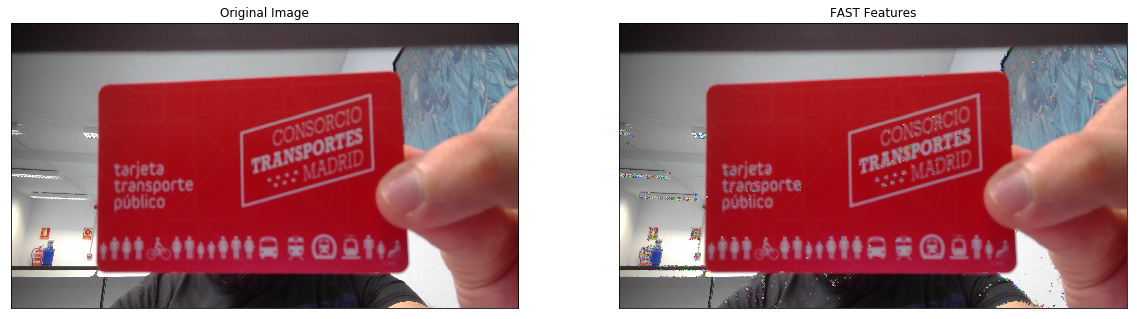

In [4]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# Find and draw keypoints
kp = fast.detect(img, None)

copy = cv2.drawKeypoints(img, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

makeplot(img, copy, "FAST Features", "Original Image", "FAST Features",1)

### 3.2.- BRIEF - Binary Robust Independent Elementary Features

Descriptor Size:  32
Descriptor Shape:  (188, 32)


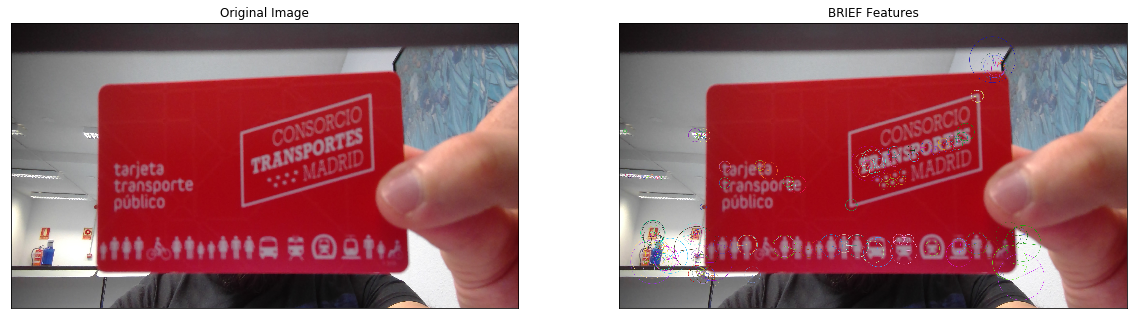

In [5]:
# Create a surf object
surf = cv2.xfeatures2d.SURF_create(THRESHOLD)

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Find the keypoints with SURF
kp = surf.detect(img, None)

# Compute the descriptors with BRIEF
kp,des = brief.compute(img, kp)

print("Descriptor Size: ", brief.descriptorSize())
print("Descriptor Shape: ", des.shape)

copy = cv2.drawKeypoints(img, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
makeplot(img, copy, "BRIEF Features using SURF Detector", "Original Image", "BRIEF Features",1)

### 3.3.- ORB - Oriented FAST and Rotated BRIEF

Descriptor Size:  32
Descriptor Shape:  (500, 32)


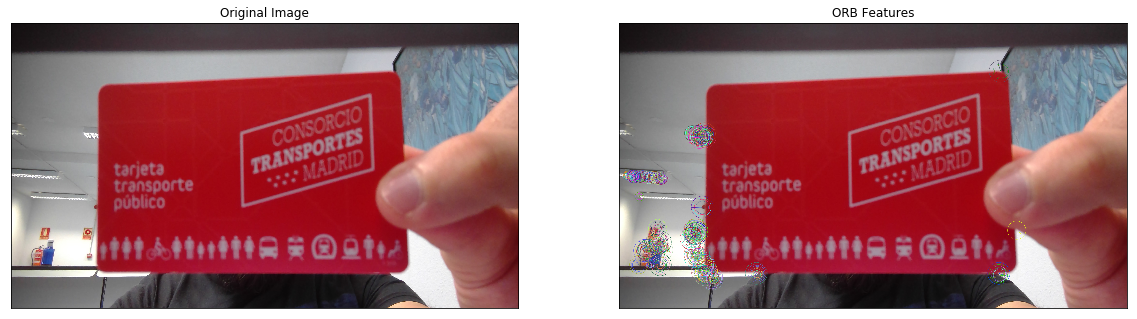

In [6]:
# Initiate ORB detector
orb = cv2.ORB_create()

# Find the keypoints with ORB
kp = orb.detect(img, None)

# Compute the descriptors
kp,des = orb.compute(img, kp)

print("Descriptor Size: ", brief.descriptorSize())
print("Descriptor Shape: ", des.shape)

copy = cv2.drawKeypoints(img, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

makeplot(img, copy, "Orb Detector", "Original Image", "ORB Features",1)

### 3.4.- BRISK - Binary robust invariant scalable keypoints

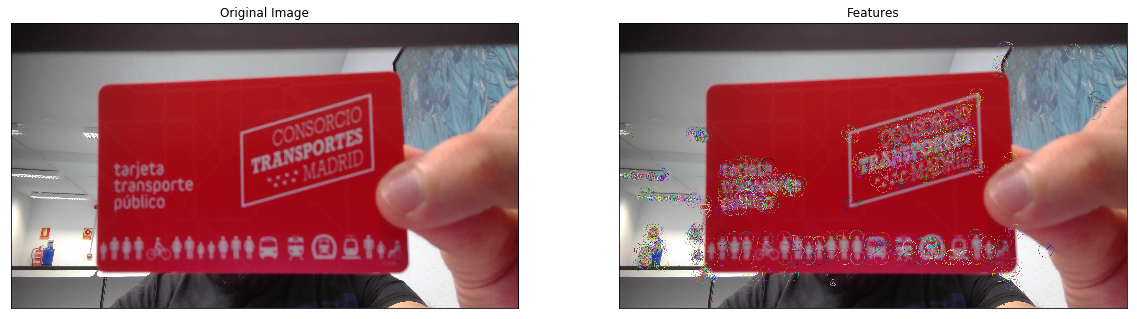

In [7]:
brisk = cv2.BRISK_create()

# Find and draw keypoints
kp = brisk.detect(img, None)

copy = cv2.drawKeypoints(img, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

makeplot(img, copy, "BRISK Features using BRIEF Detector", "Original Image", "Features",1)

### 3.5.- FREAK - Fast retina keypoint

Descriptor Size:  64
Descriptor Shape:  (3271, 64)


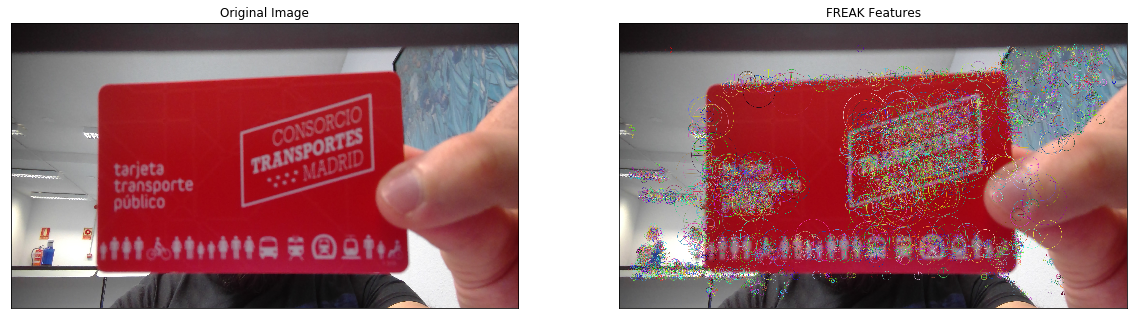

In [8]:
# Create a surf object
surfDetector = cv2.xfeatures2d.SURF_create()

keypoints = surfDetector.detect(img,None) 

freakExtractor = cv2.xfeatures2d.FREAK_create()
kp,des = freakExtractor.compute(img,keypoints)

print("Descriptor Size: ", freakExtractor.descriptorSize())
print("Descriptor Shape: ", des.shape)

copy = cv2.drawKeypoints(img, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

makeplot(img, copy, "BRIEF Features using SURF Detector", "Original Image", "FREAK Features",1)

### 3.6.- SURF - Speeded-Up Robust Features

Time taken for detecting keypoints using SURF 0.32095980644226074  seconds


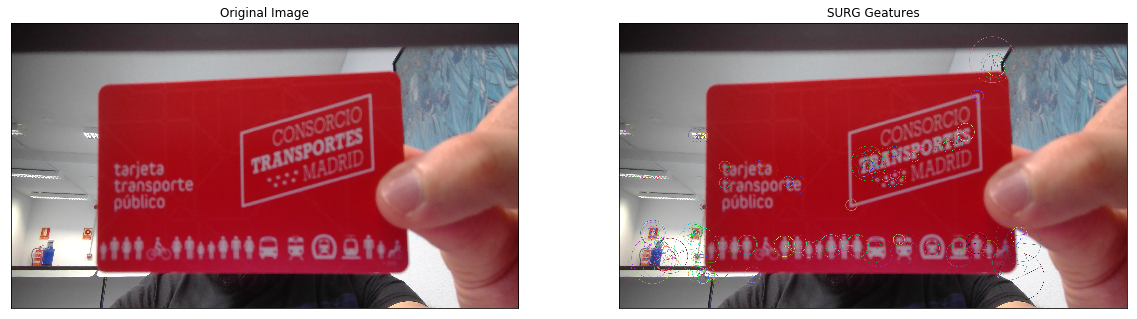

In [9]:
# Create a surf object
surf = cv2.xfeatures2d.SURF_create(THRESHOLD)

#Starting a timer
start = time.time()

# call detecAndCompute function
kp, des = surf.detectAndCompute(img, None)

# Elapsed
elapsed = time.time() - start

print("Time taken for detecting keypoints using SURF", elapsed, " seconds")

copy = cv2.drawKeypoints(img, kp, copy, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

makeplot(img, copy, "SURF Features", "Original Image", "SURG Geatures",1)

# 4.- Final implementation

We will use a self-made video of the same public transport for detecting the key points.

We will save the captions to a video file and reload it.

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

#Video
vid = cv2.VideoCapture('Test/Vid1.mp4')

# take first frame of the video
ret,frame = vid.read()

#Image
args = ['Test/tar1.jpg']
img1 = cv2.imread(args[0])
copy1 = img1.copy()
copy1 = cv2.cvtColor(copy1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    
# Detect the keypoints using SURF Detector, compute the descriptors
minHessian = 400
detector = cv2.xfeatures2d_SURF.create(hessianThreshold=minHessian)


# Matching descriptor vectors
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)

#-- Filter matches
ratio_thresh = 0.7
img_frame = []
while(1):
    ret ,frame = vid.read()
    if not ret:
        vid.release()
        break
    if ret == True:
        copy2 = frame.copy()
        copy2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
        keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
        
        knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)

        good_matches = []
        for m,n in knn_matches:
            if m.distance < ratio_thresh * n.distance:
                good_matches.append(m)

        img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)

        img3 = cv2.drawMatches(copy1, keypoints1, copy2, keypoints2, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        img3 = cv2.resize(img3, (1280, 720))

        img_frame.append(img3)
        
    else:
        break

In [11]:
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (1280, 720))

for i in range(len(img_frame)):
    out.write(img_frame[i])
out.release()

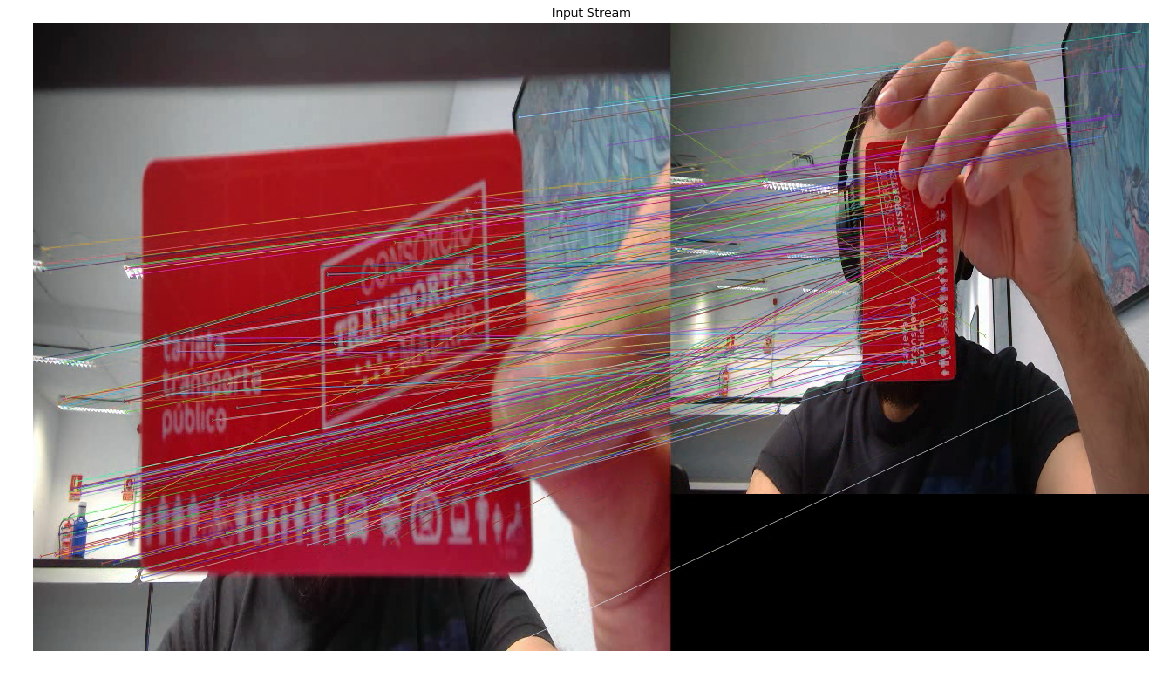

In [12]:
vid = cv2.VideoCapture('project.avi')
from IPython.display import clear_output
try:
    while(True):
        # Capture frame-by-frame
        
        ret, frame = vid.read()
        
        
        if not ret:
            vid.release()
            break
        

        
        # Turn off the axis
        plt.figure(figsize=(20,20))
        plt.axis('off')
        
        # Title of the window
        plt.title("Input Stream")
        
        # Display the frame
        plt.imshow(frame)
        plt.show()
        
        # Display the frame until new frame is available
        clear_output(wait=True)
        
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()

# 5.- Conclusion

During this project we have seen differnt implementations fo the algoritms we have seen in class. It has been really interesting to study the differences between them and how they were applied to a similar image.

Finally, we have applied one of the techniques to a video, it was interesting to think in how this could be applied in order to have real time recognition of the keypoints.

# 6.- References

- [Practical OpenCV 3 Image Processing with Python](https://learning.oreilly.com/videos/practical-opencv-3/9781787126428/9781787126428-video1_2)
- [Feature Matching](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html)
- [Feature Matching with FLANN](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html)
    